# Задача
Сравнить максимальный и минимальный доходы мужчин и женщин среди всех предложенных стран

## 0. Импорт библиотек

In [ ]:
!pip install pandas 
!pip install matplotlib
!pip install -U scikit-learn
!pip install openpyxl seaborn 

In [182]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Выгрузка данных

In [183]:
df = pd.read_excel('genders_in_eco_data.xlsx')
df.head(2)

,Название страны,Ожидаемая продолжительность жизни женщин при рождении,Ожидаемая продолжительность жизни мужчин при рождении,Ожидаемая продолжительность обучения девочек в указанной стране,Ожидаемая продолжительность обучения мальчиков в указанной стране,Средняя продолжительность обучения девочек в указанной стране,Средняя продолжительность обучения мальчиков в указанной стране,Валовой национальный доход женщин,Мужской валовой национальный доход,Материнская смертность на 1000 родившихся,Показатель рождаемости в подростковом возрасте,Женская рабочая сила,Мужская рабочая сила
0,Австралия,85.8,83.2,21.8,20.3,12.8,12.6,37486,61161,6,8.1,61.1,70.5
1,Австрия,84.1,79.0,16.4,15.6,12.0,12.6,43414,64148,5,5.5,55.5,66.3


## 02. Визуализация данных и вычисление среднего значения, разброса и корреляций параметров

Для обучения моделей в дальнейшем может потребоваться более чем 2 параметра, поэтому было принято решение взять ещё несколько параметров.

In [184]:
# Несколько параметров
params = [1, 2, 7, 8, 11, 12]

In [185]:
new_df = df.iloc[:, params]
new_df.head(3)

,Ожидаемая продолжительность жизни женщин при рождении,Ожидаемая продолжительность жизни мужчин при рождении,Валовой национальный доход женщин,Мужской валовой национальный доход,Женская рабочая сила,Мужская рабочая сила
0,85.8,83.2,37486,61161,61.1,70.5
1,84.1,79.0,43414,64148,55.5,66.3
2,73.3,65.6,10536,18076,60.4,67.3


3. Проверяем на наличие пропущенных значений

In [186]:
len(new_df)

118

In [187]:
len(new_df.dropna())

118

При обучении моделей 7 или 8 будут взяты как цели. Но не забываем о нашей задаче.

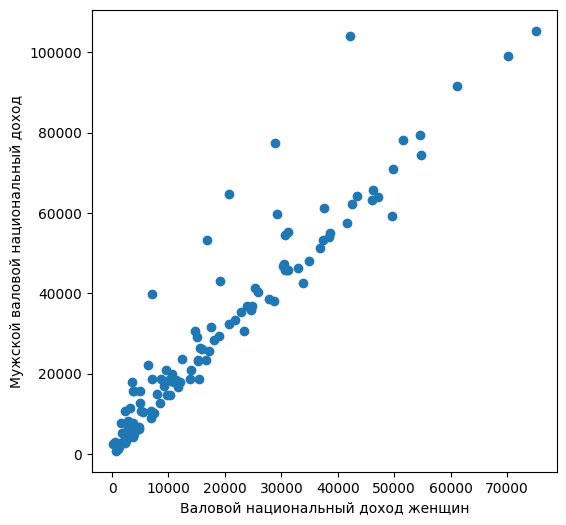

In [188]:
names = list(df.columns)
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
axs.scatter(df.iloc[:, 7].to_numpy(), df.iloc[:, 8].to_numpy())
axs.set_xlabel(names[7])
axs.set_ylabel(names[8])
        
plt.show()

Средние значения столбцов

In [189]:
new_df.mean()

Ожидаемая продолжительность жизни женщин при рождении       76.129661
Ожидаемая продолжительность жизни мужчин при рождении       70.643220
Валовой национальный доход женщин                        18627.305085
Мужской валовой национальный доход                       30277.957627
Женская рабочая сила                                        49.955085
Мужская рабочая сила                                        69.948305
dtype: float64

Дисперсия

In [190]:
new_df.var()

Ожидаемая продолжительность жизни женщин при рождении    5.654775e+01
Ожидаемая продолжительность жизни мужчин при рождении    5.807735e+01
Валовой национальный доход женщин                        2.837509e+08
Мужской валовой национальный доход                       6.199561e+08
Женская рабочая сила                                     2.198447e+02
Мужская рабочая сила                                     6.535448e+01
dtype: float64

Среднеквадратические отклонения

In [191]:
new_df.std(ddof=0)

Ожидаемая продолжительность жизни женщин при рождении        7.487892
Ожидаемая продолжительность жизни мужчин при рождении        7.588489
Валовой национальный доход женщин                        16773.379082
Мужской валовой национальный доход                       24793.189815
Женская рабочая сила                                        14.764201
Мужская рабочая сила                                         8.049884
dtype: float64

Корреляционная матрица

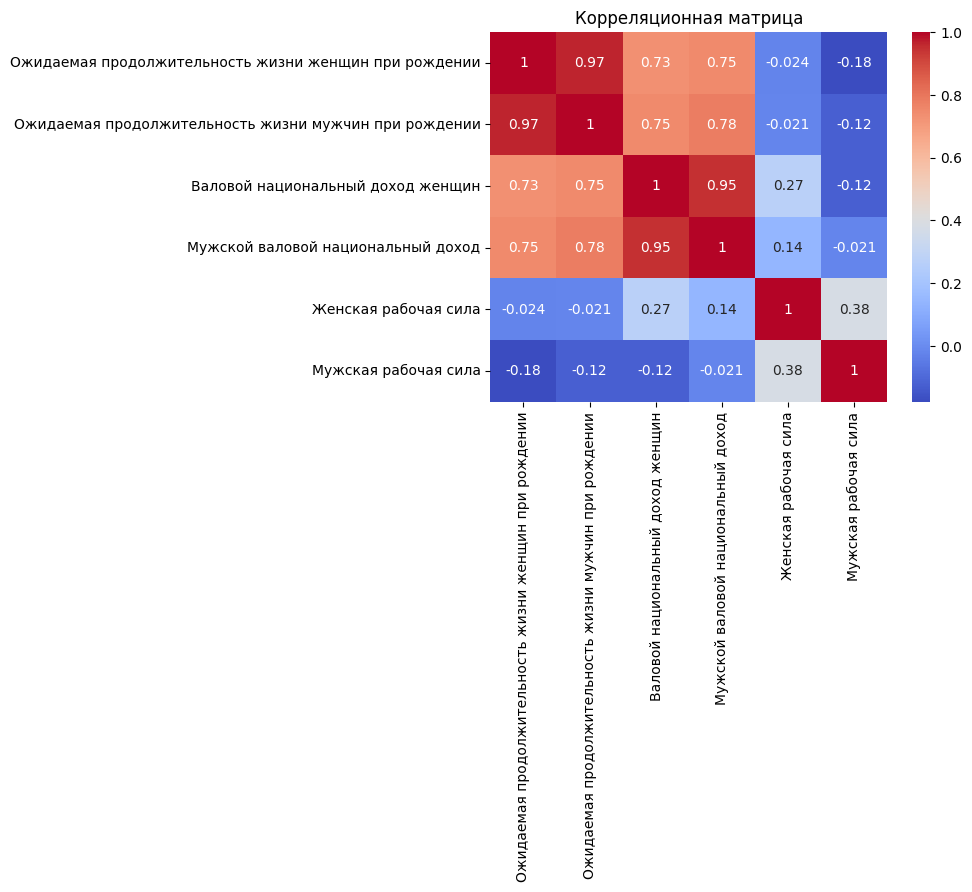

In [192]:
correlation_matrix = new_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

Интерпретация: Между доходами мужчин и женщин есть сильная корреляция, но она не равна 1. Её наличие говорит о разных заработных плат (и мужчин, и женщин) в разных странах. О том что между странами, люди независимо от пола получают больше или меньше. А вот наклон линии может дать нам другую информацию. Если линия наклонена или из неё выпадают значения, как в нашем случае, в сторону Мужского валового дохода, то это значит что в некоторых странах мужчины зарабатывают больше женщин


## 4. Категориальных призноков нет

## 5. Провести нормализацию

In [193]:
from sklearn import preprocessing

In [194]:
names = list(new_df.columns)
new_norm_df = pd.DataFrame(preprocessing.normalize(new_df, axis=0), columns=names)
new_norm_df

,Ожидаемая продолжительность жизни женщин при рождении,Ожидаемая продолжительность жизни мужчин при рождении,Валовой национальный доход женщин,Мужской валовой национальный доход,Женская рабочая сила,Мужская рабочая сила
0,0.103253,0.107800,0.137669,0.143874,0.107978,0.092175
1,0.101207,0.102359,0.159440,0.150900,0.098082,0.086684
2,0.088210,0.084996,0.038694,0.042522,0.106741,0.087991
3,0.095310,0.096010,0.042737,0.039120,0.089599,0.086553
4,0.093866,0.097046,0.013038,0.041842,0.027746,0.084330
...,...,...,...,...,...,...
113,0.102170,0.105080,0.182085,0.139557,0.109039,0.088907
114,0.095671,0.094714,0.025726,0.043691,0.054608,0.089560
115,0.097717,0.094325,0.113831,0.107894,0.101616,0.091783
116,0.087247,0.088754,0.025642,0.025206,0.099142,0.091521


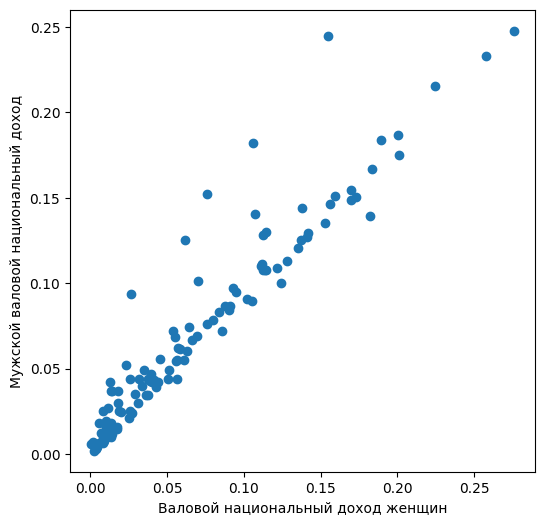

In [195]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
axs.scatter(new_norm_df.iloc[:, 2].to_numpy(), new_norm_df.iloc[:, 3].to_numpy())
axs.set_xlabel(names[2])
axs.set_ylabel(names[3])
        
plt.show()

In [196]:
list(new_norm_df.columns)

['Ожидаемая продолжительность жизни женщин при рождении',
 'Ожидаемая продолжительность жизни мужчин при рождении',
 'Валовой национальный доход женщин',
 'Мужской валовой национальный доход',
 'Женская рабочая сила',
 'Мужская рабочая сила']

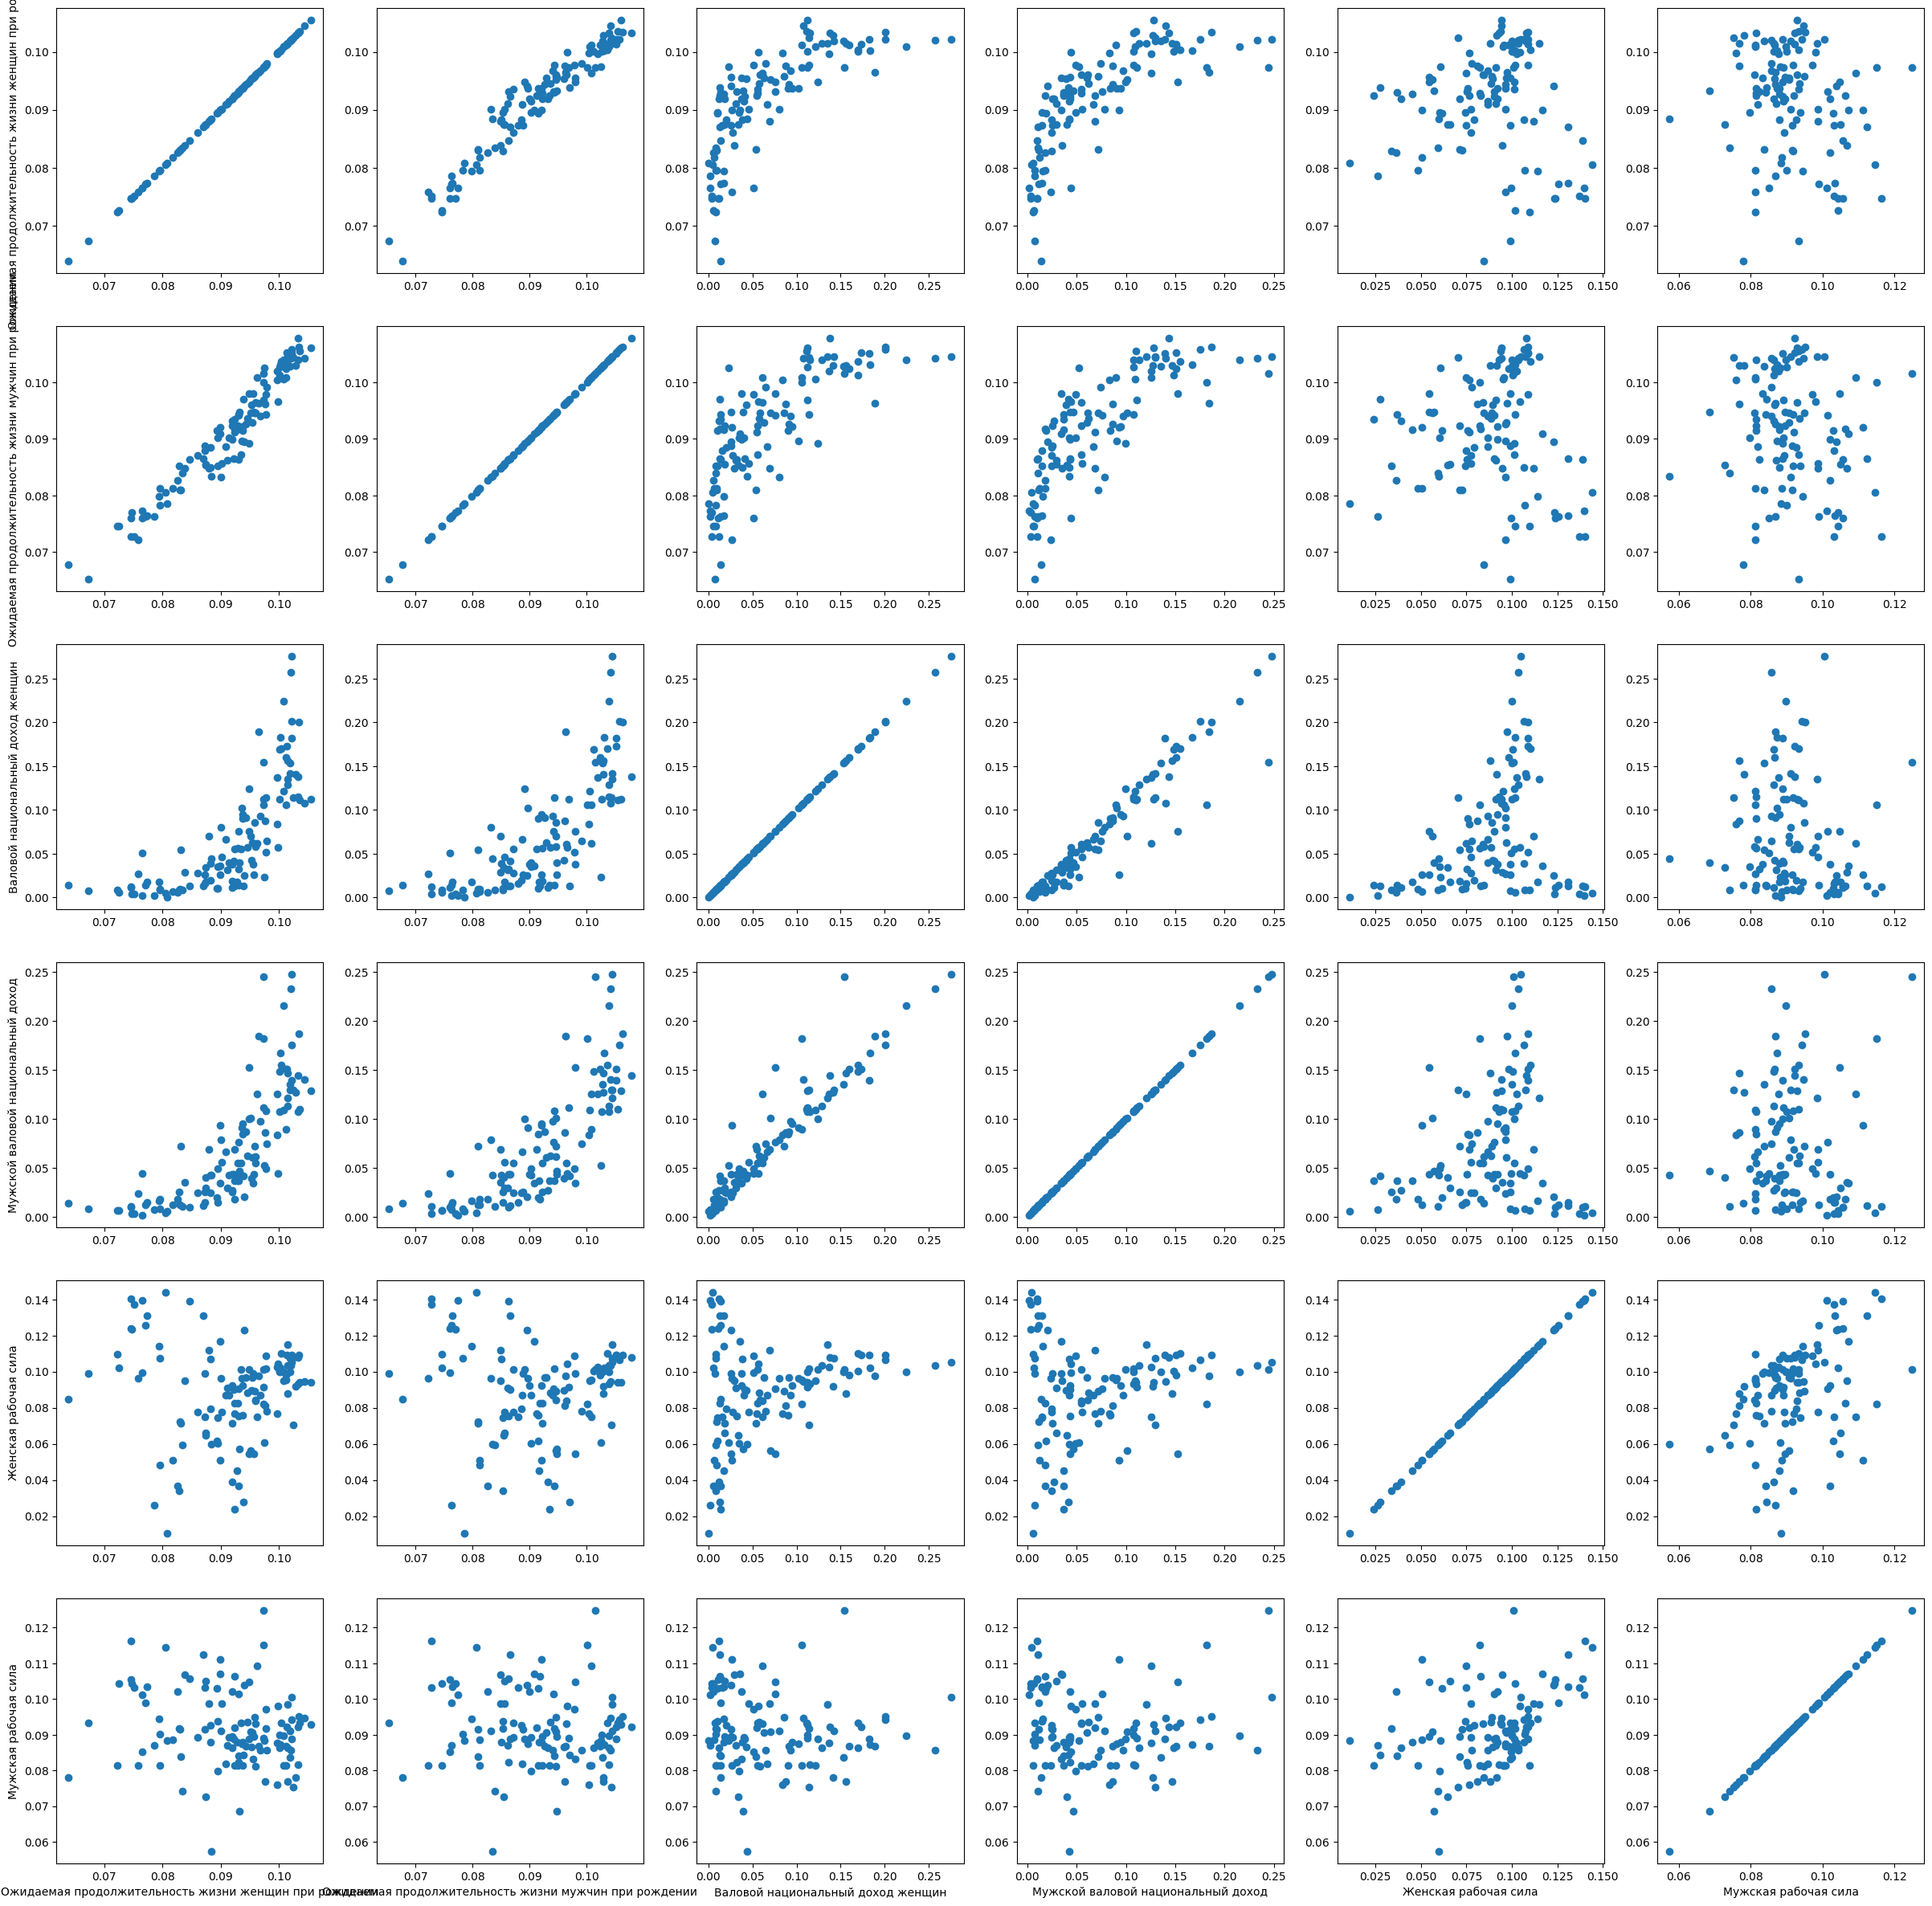

In [197]:
names = list(new_norm_df.columns)
fig, axs = plt.subplots(nrows=6, ncols=6, figsize=(30, 30))
for i in range(6):
    for j in range(6):
        axs[i][j].scatter(new_norm_df.iloc[:, j].to_numpy(), new_norm_df.iloc[:, i].to_numpy())
        if i == 5:
            axs[i][j].set_xlabel(names[j])
    axs[i][0].set_ylabel(names[i])
plt.show()

Нормализация прошла успешно

## 6. Разбить данные на обучающую и тестовую выборки

In [198]:
from sklearn.model_selection import train_test_split

In [199]:
X_train, X_test, y_train, y_test = train_test_split(
    new_norm_df.iloc[:, [0, 4]],
    new_norm_df.iloc[:, 2],
    test_size=0.25, random_state=42)


## 7. Запустить регрессию

In [200]:
from sklearn.linear_model import LinearRegression

In [201]:
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [202]:
y_pred = LR.predict(X_test)
y_pred

array([-0.04854094,  0.06791706,  0.04190471,  0.13739107, -0.01511799,
        0.05541286,  0.03936253,  0.09862258,  0.07344342,  0.06999242,
        0.02685856,  0.09702305,  0.08611944,  0.12344673,  0.06771589,
        0.12494449,  0.12556279,  0.14463564, -0.00591461,  0.09127623,
        0.05049132,  0.11508981,  0.09069864,  0.06108276,  0.00639421,
        0.08940098,  0.05847608,  0.05584348,  0.1318375 ,  0.024678  ])

## 9. Вычислить ошибки на обучающей и тестовой выборках

In [203]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [204]:
mean_squared_error(y_test, y_pred) ** 0.5

np.float64(0.02879458216021241)

In [205]:
mean_absolute_error(y_test, y_pred)

np.float64(0.022977979855570183)

In [206]:
mean_absolute_percentage_error(y_test, y_pred)

np.float64(1.56987584691078)

Средняя ошибка составляет 1.57%. Это не критичная ошибка 

## 10. Попробовать другие модели

In [207]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import BayesianRidge

In [208]:
R = Ridge()
R.fit(X_train, y_train)
BR = BayesianRidge()
BR.fit(X_train, y_train)

BayesianRidge()

Были использованны:
Хребет,
Регрессия Байесовского хребта

In [209]:
y_pred_R = R.predict(X_test)
y_pred_BR = BR.predict(X_test)

In [210]:
mean_absolute_percentage_error(y_test, y_pred_R)

np.float64(3.292927946115122)

In [211]:
mean_absolute_percentage_error(y_test, y_pred_BR)

np.float64(1.5720764014264217)

11 и 12 пункты было решено пропустить, поскольку в 7 пункте была выбрана регрессия а не классификация

## 13. Сделать выводы

В моделях можно увидеть что доход зависит от других параметров, а именно "продолжительности жизни" и "рабочей силы". Лучше всего с предсказанием справляется модель Линейной регрессии, но и Регрессия Байесовского хребта также работает хорошо. 

На этапе с корреляциями мы поняли, что в некоторых странах мужчины зарабатывают несколько больше женщин.